# Project 1
### Hanwei Wang

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import comb, perm

## 1.Buffon's Needle

D:\Software\Anaconda\lib\site-packages\numpy\lib\function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
D:\Software\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


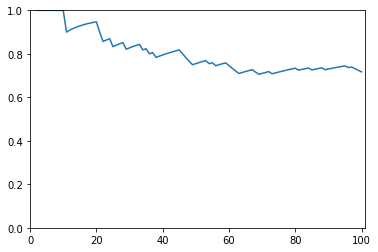

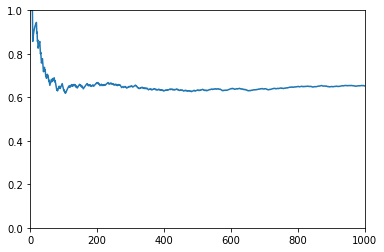

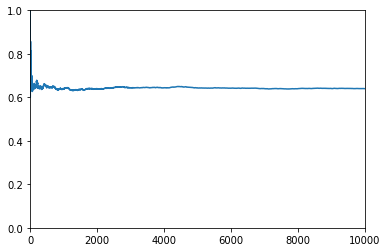

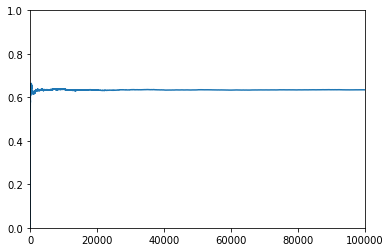

In [2]:
line_width = needle_length = 1.0

def needle_drop():
    d = np.random.uniform(0, line_width/2.)
    theta = np.random.uniform(0, np.pi/2.)
    if d / np.sin(theta) < 0.5:
        convergence_x.append(theta)
        convergence_y.append(d)
        return True
    else:
        return False

total = [100, 1000, 10000, 100000]
convergence_x = []
convergence_y = []
result = []

for nums in total:
    y = [needle_drop() for _ in range(nums)]
    y_mean = [np.average(y[0:i]) for i in range(nums)]
    result.append(y_mean[-1])
    
    plt.figure()
    plt.axis([0,nums+1,0,1])
    plt.plot(np.arange(nums)+1, y_mean)

In [3]:
[2./n for n in result]

[2.7887323943661975,
 3.0644171779141107,
 3.1251758087201127,
 3.1516097007516666]

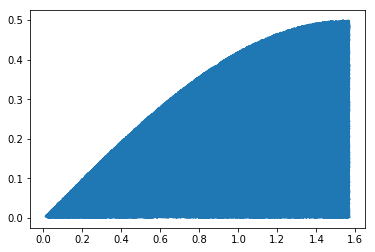

In [4]:
plt.figure()
plt.plot(convergence_x, convergence_y)

## 2.Distinct Birthday

In [5]:
student_num_max = 120
N = 10000+1
result = []

for student_num in range(2,student_num_max+1):
    tmp = 0
    for n in range(N):
        birthday = np.random.randint(1,365+1,size=student_num)
        birthday_list = birthday.tolist()
        if len(set(birthday_list))==len(birthday_list):
            tmp += 1
    result.append(tmp/N)

In [6]:
result

[0.9966003399660034,
 0.9918008199180082,
 0.9828017198280172,
 0.97000299970003,
 0.9605039496050395,
 0.9445055494450555,
 0.923007699230077,
 0.9032096790320968,
 0.8812118788121188,
 0.8601139886011399,
 0.8376162383761624,
 0.8051194880511949,
 0.7802219778022198,
 0.7478252174782521,
 0.7213278672132787,
 0.6832316768323168,
 0.6525347465253475,
 0.609039096090391,
 0.5895410458954105,
 0.5605439456054394,
 0.5189481051894811,
 0.48985101489851013,
 0.46005399460054,
 0.43545645435456454,
 0.40715928407159285,
 0.37896210378962103,
 0.33726627337266274,
 0.3140685931406859,
 0.2930706929307069,
 0.27177282271772824,
 0.24637536246375363,
 0.23047695230476953,
 0.2014798520147985,
 0.18718128187181282,
 0.16578342165783422,
 0.14678532146785322,
 0.134986501349865,
 0.1207879212078792,
 0.11248875112488751,
 0.0978902109789021,
 0.0861913808619138,
 0.0771922807719228,
 0.065993400659934,
 0.055694430556944306,
 0.0496950304969503,
 0.04229577042295771,
 0.0400959904009599,
 0.031

In [7]:
target = [perm(365,n)/365**n for n in range(2,student_num_max+1)]
target

[0.9972602739726028,
 0.9917958341152187,
 0.9836440875334497,
 0.9728644263002064,
 0.9595375163508885,
 0.9437642969040246,
 0.925664707648331,
 0.9053761661108333,
 0.8830518222889224,
 0.858858621678267,
 0.8329752111619356,
 0.8055897247675705,
 0.776897487995027,
 0.7470986802363135,
 0.71639599474715,
 0.6849923347034393,
 0.6530885821282106,
 0.6208814739684633,
 0.58856161641942,
 0.5563116648347942,
 0.5243046923374498,
 0.49270276567601456,
 0.4616557420854712,
 0.43130029603053616,
 0.401759179864061,
 0.37314071773675805,
 0.3455385276576007,
 0.3190314625222231,
 0.2936837572807314,
 0.2695453662713562,
 0.24665247214967936,
 0.22502814582422803,
 0.20468313537984575,
 0.1856167611252848,
 0.1678178936201205,
 0.15126599178361547,
 0.1359321789178791,
 0.121780335633278,
 0.10876819018205103,
 0.09684838851826462,
 0.08596952843813079,
 0.0760771443438801,
 0.0671146314485737,
 0.059024100534225084,
 0.051747156632745275,
 0.04522559716670067,
 0.03940202712057757,
 0.034

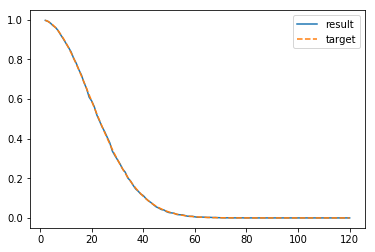

In [8]:
plt.figure()
plt.plot([x for x in range(2,student_num_max+1)], result, label='result')
plt.plot([x for x in range(2,student_num_max+1)], target, label='target', linestyle='--')
plt.legend()

## 3.Three Kings

In [9]:
cards=np.zeros((4,13),dtype=int)
for i in range (4):
    for j in range (13):
        cards[i,j]=(i*100+j)
cards_new=cards.reshape(52,1)

N=99999
n=0
for i in range (N):
    np.random.shuffle(cards_new)
    if np.sum(cards_new[0:7]%100==12)==3:
        n += 1
result = n/N
result

0.005780057800578006

$P = \frac{\tbinom{48}{4}\tbinom{4}{3}}{\tbinom{52}{7}}$

In [10]:
target = comb(48,4)*comb(4,3)/comb(52,7)
target

0.005817711700064641

## 4.Calculate Area

In [11]:
N = 10001
n = 0
for i in range(N):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    if y < 1/(x+1):
        n += 1
result = n/N
result

0.692030796920308

In [12]:
target = np.log(2)
target

0.6931471805599453

In [13]:
print('Err:',abs(result-target)/target)

Err: 0.0016106011406342843


## 5.Toss Coin

In [14]:
N = 10001
p_a = p_b = p_c = p_d = p_e = 0
n_a = n_b = n_c = n_d = n_e = 0
for i in range(N):
    toss = np.random.randint(0,2,size=3) # head=0 and tail=1
    if toss[0]==0:
        p_a += 1
        if toss[0]+toss[1]+toss[2]==1: n_a += 1
    if toss[0]==1:
        p_b += 1
        if toss[0]+toss[1]+toss[2]==1: n_b += 1
    if toss[0]+toss[1]==0:
        p_c += 1
        if toss[0]+toss[1]+toss[2]==1: n_c += 1
    if toss[0]+toss[1]==2:
        p_d += 1
        if toss[0]+toss[1]+toss[2]==1: n_d += 1
    if toss[0]+toss[2]==0:
        p_e += 1
        if toss[0]+toss[1]+toss[2]==1: n_e += 1

print('results: p_a:%f p_b:%f p_c:%f p_d:%f p_e:%f' % (n_a/p_a, n_b/p_b, n_c/p_c, n_d/p_d, n_e/p_e))

results: p_a:0.497329 p_b:0.249292 p_c:0.481279 p_d:0.000000 p_e:0.490421


In [15]:
print('targets: p_a:%f p_b:%f p_c:%f p_d:%f p_e:%f' % (2/4, 1/4, 1/2, 0, 1/2))

targets: p_a:0.500000 p_b:0.250000 p_c:0.500000 p_d:0.000000 p_e:0.500000


## 6.Choose Ball

In [16]:
N = 10001
n = 0
urn = np.array([0,0,0,0,1,1])
for i in range(N):
    np.random.shuffle(urn)
    if urn[0]+urn[1]==1: #one red and one black
        n += 1
result = n/N
result

0.5208479152084792

$P = \frac{\tbinom{4}{1}\tbinom{2}{1}}{\tbinom{6}{2}}$

In [17]:
target = comb(4,1)*comb(2,1)/comb(6,2)
target

0.5333333333333333

## 7.N! Approximation

$results = \sqrt{2\pi}N^{N+\frac12}e^{-N} \quad targets = N!$

In [18]:
N = 100
results = [np.sqrt(2*np.pi)*pow(i,i+0.5)*pow(np.e,-i) for i in range(1,N+1)]
targets = [np.math.factorial(i) for i in range(1,N+1)]

In [19]:
print(results)
print(targets)

[0.9221370088957891, 1.9190043514889832, 5.836209591345864, 23.506175132893297, 118.0191679575901, 710.0781846421851, 4980.395831612462, 39902.39545265672, 359536.8728419484, 3598695.6187410373, 39615625.0505775, 475687486.4727761, 6187239475.192715, 86661001740.59885, 1300430722199.467, 20814114415223.145, 353948328666100.8, 6372804626194314.0, 1.2111278659229405e+17, 2.4227868467611356e+18, 5.088861732550969e+19, 1.1197514946282354e+21, 2.575852537052935e+22, 6.18297927022795e+23, 1.5459594834691166e+25, 4.020009930609545e+26, 1.085531517031955e+28, 3.0398232624334204e+29, 8.816392105377483e+30, 2.645170959229647e+32, 8.200764697241136e+33, 2.624465140819332e+35, 8.661418381417953e+36, 2.945100960998238e+38, 1.0308575166584053e+40, 3.7113324908741615e+41, 1.373278928335764e+43, 5.218769211900566e+44, 2.035434434830073e+46, 8.142172644946241e+47, 3.33846040699164e+49, 1.4022212235243652e+51, 6.029829470665723e+52, 2.6532418206505445e+54, 1.1940090686044411e+56, 5.492662822140244e+57, 

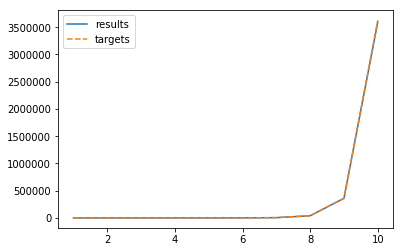

In [21]:
X = [i for i in range(1,N+1)]
plt.figure()
plt.plot(X[:10],results[:10],label='results')
plt.plot(X[:10],targets[:10],label='targets',linestyle='--')
plt.legend()

In [23]:
import math
i = 200
result200 = np.log(math.sqrt(2*np.pi)) + (i+0.5)*np.log(i) + (-i)
target200 = math.log(np.math.factorial(200))

In [24]:
print('result:',result200)
print('target:',target200)

result: 863.231570526086
target: 863.2319871924054


## 8.Compare Hypergeometric and Binomial Distribution When N is Large

$Hypergeometric = \frac{\tbinom{M}{k}\tbinom{N-M}{n-k}}{\tbinom{N}{n}} \quad Binomial = \tbinom{N}{k}p^k(1-p)^{N-k}$

In [25]:
N = 1000
n = 100
p = 0.94
M = N*p
hy = []
bi = []
for k in range(95,100+1):
    hy.append(comb(M,k)*comb(N-M,n-k)/comb(N,n))
    bi.append(comb(n,k)*pow(p,k)*pow(1-p,n-k))
print('hypergeometric:',hy)
print('binomial:',bi)

hypergeometric: [0.16961641341442305, 0.13330158978339024, 0.08139377231113502, 0.0362147871525206, 0.010440969280078231, 0.0014634758607572872]
binomial: [0.16391750515911446, 0.13375213094580507, 0.08641031140141352, 0.04144167995782073, 0.013116221939512273, 0.002054874770523587]


## 9.Geometric Distribution

In [26]:
p = 0.25
N = 10001
result = []

for i in range(N):
    count = num = 0
    while num == 0:
        num = int(np.random.randint(1,4+1)*p)
        count += 1
    result.append(count)
np.sum([i>=4 for i in result])/N

0.42375762423757624

In [27]:
target = (1-p)**3
target

0.421875

## 10.Poisson Variable

$Poisson = \frac{\lambda^k}{k!}e^{-\lambda} \quad Binomial = \tbinom{N}{k}p^k(1-p)^{N-k}$

In [30]:
X = [i for i in range(100)]
pois = [np.e**(-1)/np.math.factorial(x) for x in X]
binamial = [comb(100,x)*pow(0.01,x)*pow(1-0.01,100-x) for x in X]
print('poisson:',pois)
print('\n')
print('binamial:',binamial)

poisson: [0.36787944117144233, 0.36787944117144233, 0.18393972058572117, 0.06131324019524039, 0.015328310048810098, 0.0030656620097620196, 0.0005109436682936699, 7.299195261338141e-05, 9.123994076672677e-06, 1.0137771196302974e-06, 1.0137771196302975e-07, 9.216155633002704e-09, 7.68012969416892e-10, 5.907792072437631e-11, 4.2198514803125934e-12, 2.8132343202083955e-13, 1.7582714501302472e-14, 1.0342773236060278e-15, 5.745985131144599e-17, 3.0242027006024205e-18, 1.5121013503012103e-19, 7.200482620481953e-21, 3.272946645673615e-22, 1.4230202807276587e-23, 5.929251169698579e-25, 2.3717004678794313e-26, 9.121924876459351e-28, 3.378490694984945e-29, 1.2066038196374804e-30, 4.160702826336139e-32, 1.3869009421120463e-33, 4.473874006813053e-35, 1.398085627129079e-36, 4.236623112512361e-38, 1.2460656213271648e-39, 3.560187489506185e-41, 9.889409693072736e-43, 2.672813430560199e-44, 7.033719554105787e-46, 1.8035178343860992e-47, 4.508794585965248e-49, 1.0997059965768898e-50, 2.6183476108973566e

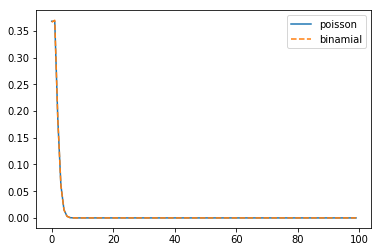

In [31]:
plt.figure()
plt.plot(X,pois,label='poisson')
plt.plot(X,binamial,label='binamial',linestyle='--')
plt.legend()

## 11.Normal Distribution

In [32]:
miu = 0
sigma = 1
size = 10001
normal = np.random.normal(miu,sigma,size = 10001)
a1 = sum([x>miu+1*sigma for x in normal])
a2 = sum([x>miu+2*sigma for x in normal])
a3 = sum([x>miu+3*sigma for x in normal])
print('results:')
print('a=1:',a1/size)
print('a=2:',a2/size)
print('a=3:',a3/size)

results:
a=1: 0.15708429157084292
a=2: 0.0216978302169783
a=3: 0.0017998200179982


In [33]:
print('targets:')
print('a=1:',1-0.8413)
print('a=2:',1-0.9772)
print('a=3:',1-0.9987)

targets:
a=1: 0.15869999999999995
a=2: 0.022800000000000042
a=3: 0.0012999999999999678


## 12.Simulate Random Variables

In [34]:
p=0.1
lam = 0.1

U = np.random.uniform(size=100001)
geometric = [math.ceil(np.log(1-u)/np.log(1-p)) for u in U]
exponential = [-1/lam*np.log(1-u) for u in U]

In [35]:
E_geo = np.average(geometric)
V_geo = np.var(geometric)
E_exp = np.average(exponential)
V_exp = np.var(exponential)
print('results:')
print('E_geo:',E_geo)
print('V_geo:',V_geo)
print('E_exp:',E_exp)
print('V_exp:',V_exp)

results:
E_geo: 10.00690993090069
V_geo: 91.05215173086017
E_exp: 10.007859060391688
V_exp: 101.18731519882549


In [36]:
print('targets:')
print('E_geo:',1/p)
print('V_geo:',(1-p)/p**2)
print('E_exp:',1/lam)
print('V_exp:',1/lam**2)

targets:
E_geo: 10.0
V_geo: 89.99999999999999
E_exp: 10.0
V_exp: 99.99999999999999
